TITANIC DISASTER

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv("D:/uni/KAGGLE COMPETITIONS/titanic/train.csv")
test = pd.read_csv("D:/uni/KAGGLE COMPETITIONS/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PREPROCESSING

In [4]:
columns = train.columns
for i in columns:
    print(train[i].describe())
    print("\n")

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


count                                         891
unique                                        891
top       Meek, Mrs. Thomas (Annie Louise Rowley)
freq                                            1
Name: Name, dtype: object


count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%  

DROPPO LE COLONNE CHE DI SICURO NON SERVONO ALL'ALGORITMO OVVERO NAME, ID E TICKET

In [5]:
train.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
columns = train.columns    #risetto le colonne, ora che ne sono state droppate 3

In [6]:
for i in columns:
    print("La variabile %s ha %d missing value" % (i, train[i].isnull().values.sum()))

La variabile Survived ha 0 missing value
La variabile Pclass ha 0 missing value
La variabile Sex ha 0 missing value
La variabile Age ha 177 missing value
La variabile SibSp ha 0 missing value
La variabile Parch ha 0 missing value
La variabile Fare ha 0 missing value
La variabile Cabin ha 687 missing value
La variabile Embarked ha 2 missing value


Cabin ha 687 missing value, inoltre ha 147 attributi unici rendondo dunque complicato ogni processo di dummizzazione o di utilizzo di label encoder. Verrà dunque eliminata. Per Embarked verrà utilizzato un rimpiazzamento con la moda, mentre Age useremo la mediana --- nei prossimi stack usare la regressione se possibile, magari con Knime

In [7]:
train.drop(["Cabin"], axis = 1, inplace = True)
columns = train.columns

In [8]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [9]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [10]:
for i in columns:
    print("La variabile %s ha %d missing value" % (i, train[i].isnull().values.sum()))

La variabile Survived ha 0 missing value
La variabile Pclass ha 0 missing value
La variabile Sex ha 0 missing value
La variabile Age ha 0 missing value
La variabile SibSp ha 0 missing value
La variabile Parch ha 0 missing value
La variabile Fare ha 0 missing value
La variabile Embarked ha 0 missing value


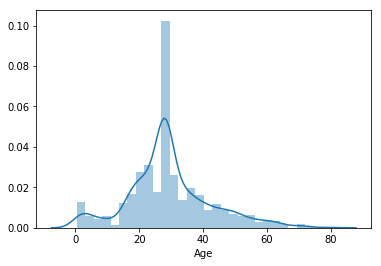

In [11]:
sns.distplot(train["Age"])

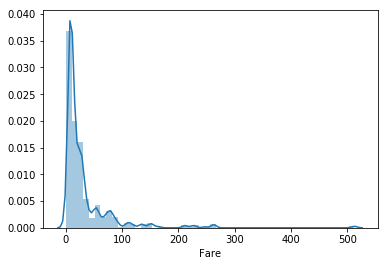

In [12]:
sns.distplot(train["Fare"])

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

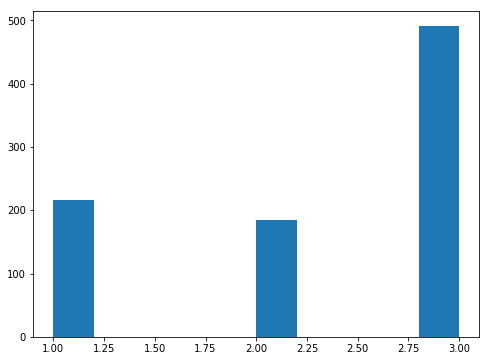

In [13]:
f, ax = plt.subplots(figsize= (8,6))
plt.hist(train["Pclass"], range = (train["Pclass"].min(), train["Pclass"].max()))

(array([314.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 577.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

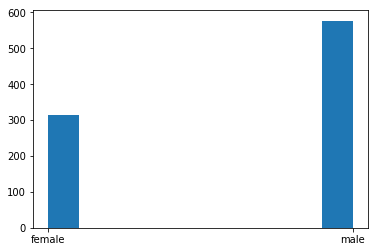

In [14]:
f, ax = plt.subplots(figsize= (6,4))
plt.hist(train["Sex"], range = (train["Sex"].min(), train["Sex"].max()))

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

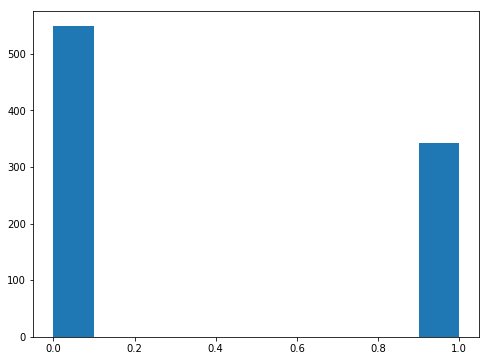

In [15]:
f, ax = plt.subplots(figsize= (8,6))
plt.hist(train["Survived"])

In [16]:
train['Pclass'] = train['Pclass'].apply(str)
train["Pclass"].describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
cols = ("Pclass", "Embarked")
for i in cols:
    le = LabelEncoder()
    le.fit(list(train[i].values))
    train[i] = le.transform(list(train[i].values))

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,22.0,1,0,7.2500,2
1,1,0,female,38.0,1,0,71.2833,0
2,1,2,female,26.0,0,0,7.9250,2
3,1,0,female,35.0,1,0,53.1000,2
4,0,2,male,35.0,0,0,8.0500,2


In [20]:
train = pd.get_dummies(train)

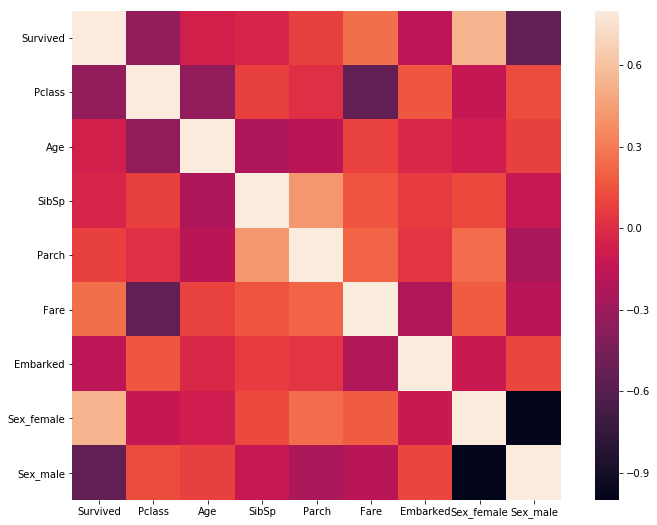

In [21]:
#corrmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = .8, square = True)

In [22]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,2,22.0,1,0,7.2500,2,0,1
1,1,0,38.0,1,0,71.2833,0,1,0
2,1,2,26.0,0,0,7.9250,2,1,0
3,1,0,35.0,1,0,53.1000,2,1,0
4,0,2,35.0,0,0,8.0500,2,0,1


DROPPO SEX_MALE IN QUANTO CORR = 1 (OVVIAMENTE) CON SEX_FEMALE E QUINDI RISULTA ESSERE RIDONDANTE

In [23]:
train.drop(train.columns[-1], axis = 1, inplace = True)

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
0,0,2,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,1,2,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,0,2,35.0,0,0,8.0500,2,0


ORA APPLICO TUTTO QUESTO PREPROCESSING AL TEST

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test_Id = test["PassengerId"]
test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True) #Rimuovo l'id pure dal test e lo salvo in una lista, in modo poi da riattaccarlo per la submission
columns_test = test.columns    #risetto le colonne, ora che ne sono state droppate 3

In [27]:
print("TEST:\n")
for i in columns_test:
    print("La variabile %s ha %d missing value" % (i, test[i].isnull().values.sum()))

TEST:

La variabile Pclass ha 0 missing value
La variabile Sex ha 0 missing value
La variabile Age ha 86 missing value
La variabile SibSp ha 0 missing value
La variabile Parch ha 0 missing value
La variabile Fare ha 1 missing value
La variabile Embarked ha 0 missing value


In [28]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
print("TEST:\n")
for i in columns_test:
    print("La variabile %s ha %d missing value" % (i, test[i].isnull().values.sum()))

TEST:

La variabile Pclass ha 0 missing value
La variabile Sex ha 0 missing value
La variabile Age ha 0 missing value
La variabile SibSp ha 0 missing value
La variabile Parch ha 0 missing value
La variabile Fare ha 0 missing value
La variabile Embarked ha 0 missing value


In [29]:
test['Pclass'] = test['Pclass'].apply(str)
test["Pclass"].describe()

count     418
unique      3
top         3
freq      218
Name: Pclass, dtype: object

In [30]:
cols = ("Pclass", "Embarked")
for i in cols:
    le = LabelEncoder()
    le.fit(list(test[i].values))
    test[i] = le.transform(list(test[i].values))

In [31]:
test = pd.get_dummies(test)

In [32]:
test.drop(test.columns[-1], axis = 1, inplace = True)

In [33]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
0,2,34.5,0,0,7.8292,1,0
1,2,47.0,1,0,7.0000,2,1
2,1,62.0,0,0,9.6875,1,0
3,2,27.0,0,0,8.6625,2,0
4,2,22.0,1,1,12.2875,2,1


MODELLING

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [35]:
target_train = train.Survived.values
train.drop(["Survived"], axis = 1, inplace = True)

In [36]:
X = train
y = target_train

SLPITTO IL TRAIN IN TRAIN E VALIDATION, QUESTULTIMO COSTITUITO DAL 33% DEL TRAIN INIZIALE. FACCIO QUESTA OPERAZIONE PER FARE POI L'HOLDOUT

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=0)

In [38]:
from sklearn.model_selection import cross_val_score

LOGISTIC REGRESSION - CROSS VALIDATION

In [39]:
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.78212291, 0.7877095 , 0.78089888, 0.76966292, 0.82485876])

HOLD OUT

In [40]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
acc_log_reg = round(model.score(x_test, y_test) * 100, 2)
acc_log_reg

78.98

In [42]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [84]:
confusion_matrix(pred, y_test)

array([[154,  32],
       [ 30,  79]], dtype=int64)

ROC CURVE DELLO SCORE SUL VALIDATION (33% DEL TRAIN)

In [43]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

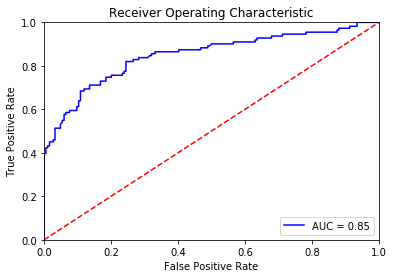

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SUPPORT VECTOR MACHINE - CV

In [45]:
model1 = SVC()
scores = cross_val_score(model1, X, y, cv=5)
scores

array([0.60893855, 0.63687151, 0.7247191 , 0.75280899, 0.73446328])

HOLDOUT

In [46]:
model1 = SVC(probability = True)
model1.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
acc_SVC = round(model1.score(x_test, y_test) * 100, 2)
acc_SVC

70.85

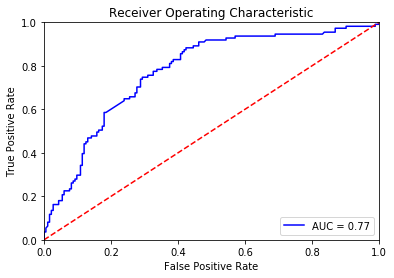

In [48]:
probs = model1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

RANDOM FOREST

CROSS VALIDATION

In [49]:
model2 = RandomForestClassifier()
scores = cross_val_score(model2, X, y, cv = 5)
scores

array([0.77653631, 0.80446927, 0.84269663, 0.78651685, 0.77966102])

HOLDOUT

In [50]:
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
acc_RF = round(model2.score(x_test, y_test) * 100, 2)
acc_RF

82.03

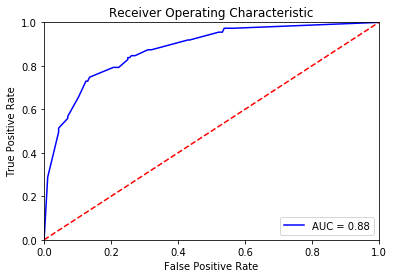

In [52]:
probs = model2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

PERCEPTRON

In [53]:
model3 = Perceptron()

CROSS VALIDATION

In [54]:
scores = cross_val_score(model3, X, y, cv = 5)
scores

D:\Programmi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Programmi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Programmi\Anaconda3\lib\site-packages\sklearn\linear_mode

array([0.4972067 , 0.60893855, 0.69662921, 0.7247191 , 0.40677966])

HOLDOUT

In [55]:
model3 = Perceptron()
model3.fit(x_train, y_train)
acc_RF = round(model3.score(x_test, y_test) * 100, 2)
acc_RF

D:\Programmi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


62.37

DECISION TREE

CV

In [56]:
model4 = DecisionTreeClassifier()
scores = cross_val_score(model4, X, y, cv = 5)
scores

array([0.73184358, 0.77653631, 0.80337079, 0.74719101, 0.80225989])

HOLDOUT

In [57]:
model4 = DecisionTreeClassifier()
model4.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
acc_dtc = round(model4.score(x_test, y_test) * 100, 2)
acc_dtc

77.97

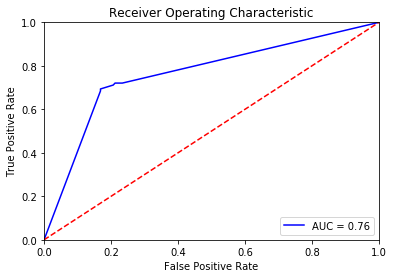

In [59]:
probs = model4.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

PROVO CON I NEURAL NETWORKS

In [60]:
from sklearn.neural_network import MLPClassifier

In [61]:
model5 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(14, 7), random_state=1)

CV

In [62]:
scores = cross_val_score(model5, X, y, cv = 5)
scores

array([0.81005587, 0.79329609, 0.78651685, 0.80337079, 0.82485876])

HOLDOUT

In [63]:
model5.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(14, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [64]:
acc_neuralnet = round(model5.score(x_test, y_test) * 100, 2)
acc_neuralnet

78.31

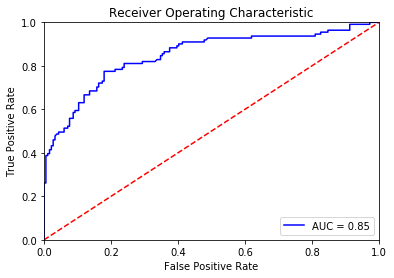

In [65]:
probs = model5.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBOOST CLASSIFIER

In [66]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=630, learning_rate=0.04)
scores = cross_val_score(gbm, X, y, cv = 5)
scores

D:\Programmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Programmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Programmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Programmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future

array([0.81564246, 0.81564246, 0.87078652, 0.83146067, 0.84180791])

In [67]:
scores.mean()

0.8350680033633747

In [68]:
gbm.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=630,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [69]:
acc = round(gbm.score(x_test, y_test) * 100, 2)
acc

D:\Programmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


83.73

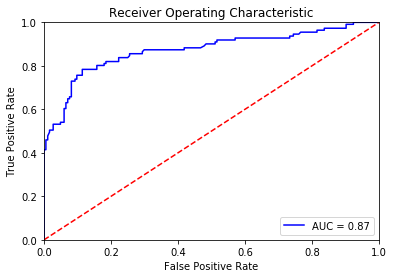

In [70]:
probs = gbm.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ADABOOST CLASSIFIER

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
adamod = AdaBoostClassifier( n_estimators=100)
scores = cross_val_score(adamod, X, y, cv = 5)
scores

array([0.75977654, 0.80446927, 0.82022472, 0.82022472, 0.83050847])

In [73]:
scores.mean()

0.8070407445668769

In [74]:
adamod.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [75]:
acc = round(adamod.score(x_test, y_test) * 100, 2)
acc

80.0

GRADIENT BOOSTING CLASSIFIER

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gbmodel = GradientBoostingClassifier(n_estimators=300, learning_rate=1, max_depth=1, random_state=0)

In [78]:
scores = cross_val_score(gbmodel, X, y, cv = 5)
scores

array([0.77653631, 0.80446927, 0.85955056, 0.8258427 , 0.8079096 ])

In [79]:
scores.mean()

0.8148616899077838

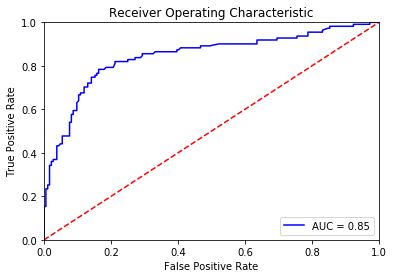

In [80]:
gbmodel.fit(x_train, y_train)
probs = gbmodel.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

EXTRA TREES CLASSIFIER

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
etc = ExtraTreesClassifier(n_estimators=400, max_depth=None,min_samples_split=6, random_state=0)

In [83]:
scores = cross_val_score(etc, X, y, cv = 10)
scores

array([0.77777778, 0.81111111, 0.74157303, 0.86516854, 0.91011236,
       0.85393258, 0.85393258, 0.79775281, 0.88764045, 0.84090909])

In [237]:
scores.mean()

0.8339657814096016

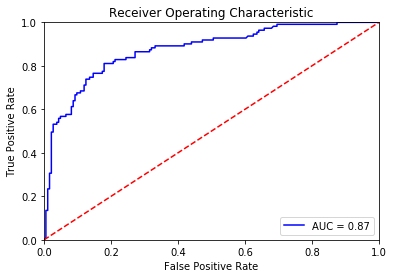

In [247]:
etc.fit(x_train, y_train)
probs = etc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

BAGGING - KKNEIGHBORS

In [240]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [243]:
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.7, max_features=0.7)
scores = cross_val_score(bagging, X, y, cv = 10)
scores

array([0.67777778, 0.67777778, 0.7752809 , 0.80898876, 0.75280899,
       0.79775281, 0.86516854, 0.74157303, 0.78651685, 0.78409091])

In [244]:
scores.mean()

0.7667736352286914

PROVO A PREVEDERE IL TEST CON LA SVM E FACCIO LA PRIMA SUBMISSION

In [49]:
test_pred = model1.predict(test)
submission_SVM = pd.DataFrame({"Survived" : test_pred}, index = test_Id)
submission_SVM.to_csv("submission_SVM.csv")
submission_SVM.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


PREVEDO IL TEST CON LA RANDOM FOREST

In [50]:
test_pred2 = model2.predict(test)
submission_RF = pd.DataFrame({"Survived" : test_pred2}, index = test_Id)
submission_RF.to_csv("submission_RF.csv")
submission_RF.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


PREVEDO IL TEST CON IL DECISION TREE

In [51]:
test_pred3 = model4.predict(test)
submission_DT = pd.DataFrame({"Survived" : test_pred3}, index = test_Id)
submission_DT.to_csv("submission_DT.csv")
submission_DT.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


SUBMISSION XGBOOST

In [126]:
test_pred = gbm.predict(test)
submission = pd.DataFrame({"Survived" : test_pred}, index = test_Id)
submission.to_csv("submission_SVM.csv")
submission.head()

D:\Programmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [127]:
submission.to_csv("subm.csv")

EXTRA TREES CLASSIFIER SUBM

In [248]:
test_pred = etc.predict(test)
submission = pd.DataFrame({"Survived" : test_pred}, index = test_Id)
submission.to_csv("submission_SVM.csv")
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


In [249]:
submission.to_csv("subm.csv")